In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CARGA DE DATOS
*Nota: cargar solo uno y al terminar de correr el notbook y guardar el resultado, cargar el otro y volver a correr el notbook*

In [10]:
df = pd.read_parquet('Datasets_original/train.parquet', engine='pyarrow')

In [2]:
df = pd.read_parquet('Datasets_original/test.parquet', engine='pyarrow')

# TRANSFORMACION
*Nota: para informacion del porque se descartaron y modificaron variables ver los puntos 1.1 y 1.2, respectivamente, dentro del README*

el siguiente bloque solo para train.parquet

In [11]:
#se elimina las filas con precio 0
df = df[df['price'] != 0]

#se crea la columna isLow que sera le variable objetivo
df['isLow'] = df['price'].apply( lambda price: 1 if price <= 999  else 0 )

#se combinan las columnas state y region
df['location'] = (df['state'] + '-' + df['region'])

#se crea el df donde se ira adaptando la data para el modelo
df_adpt = df[['price',
 'sqfeet',
 'beds',
 'baths',
 'cats_allowed',
 'dogs_allowed',
 'smoking_allowed',
 'wheelchair_access',
 'electric_vehicle_charge',
 'comes_furnished',]]

<AxesSubplot: >

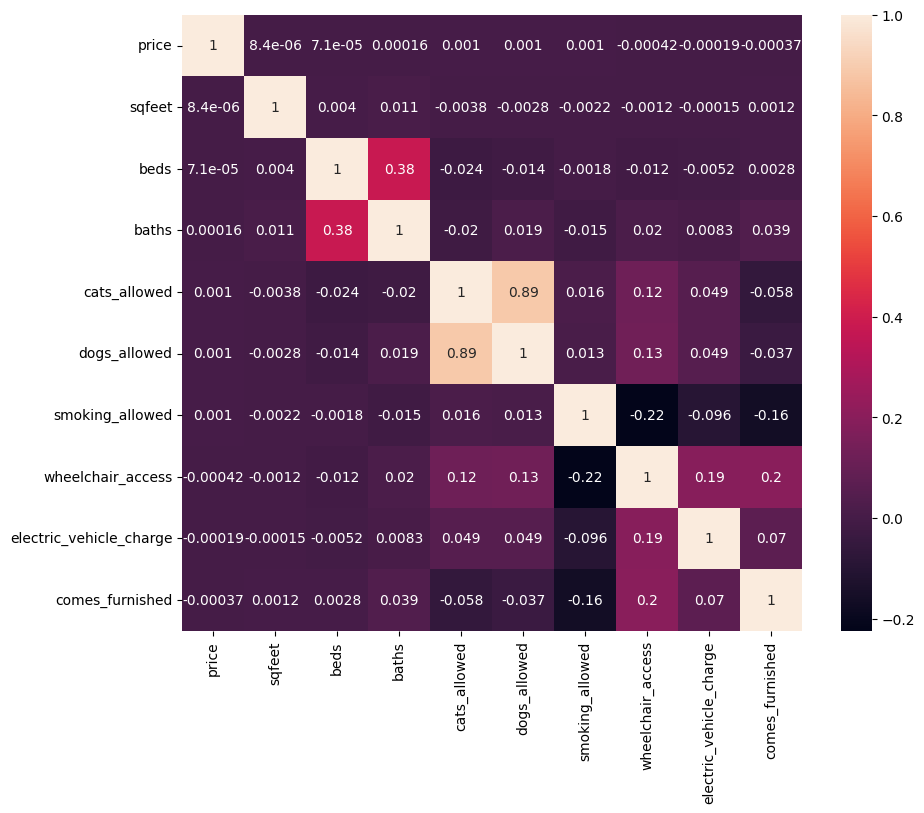

In [15]:
#Este bloque NO hace parte de la transformacion, unicament es para el analicis de datos
corr = df_adpt.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True)

el siguiente bloque solo para test.parquet

In [3]:
#se combinan las columnas state y region
df['location'] = (df['state'] + '-' + df['region'])

#se crea el df donde se ira adaptando la data para el modelo
df_adpt = df[['sqfeet',
 'beds',
 'baths',
 'cats_allowed',
 'dogs_allowed',
 'smoking_allowed',
 'wheelchair_access',
 'electric_vehicle_charge',
 'comes_furnished',]]


### Creacion dummies

In [4]:
#funcion que informa si existe alguna correlacion perfecta
def perfectCorrelation(corr: pd.DataFrame) -> bool:
    columns = list(corr.columns.values)
    perfectCorr = False
    for i in columns:
        if (corr[i].value_counts()[1] != 1) or (-1 in corr[i].unique()):
            perfectCorr = True
            print(i)
            
    return perfectCorr

In [5]:
#se crean las dummies de "type" y se verifica que no haya correlacion perfecta entre ellas
df_dummies = pd.get_dummies(df['type'], columns=['type'], prefix='type')
perfectCorrelation(df_dummies.corr())

False

In [6]:
#si no hay correlacion perfecta se agregan las dummies al df adaptado
df_adpt = pd.concat([df_adpt, df_dummies], axis=1)

In [7]:
#se crean las dummies de "laundry_options" y se verifica que no haya correlacion perfecta entre ellas
df_dummies = pd.get_dummies(df['laundry_options'], columns=['laundry_options'], prefix='laundry')
perfectCorrelation(df_dummies.corr())

False

In [8]:
#si no hay correlacion perfecta se agregan las dummies al df adaptado
df_adpt = pd.concat([df_adpt, df_dummies], axis=1)

In [9]:
#se crean las dummies de "parking_options" y se verifica que no haya correlacion perfecta entre ellas
df_dummies = pd.get_dummies(df['parking_options'], columns=['parking_options'], prefix='parking')
perfectCorrelation(df_dummies.corr())

False

In [10]:
#si no hay correlacion perfecta se agregan las dummies al df adaptado
df_adpt = pd.concat([df_adpt, df_dummies], axis=1)

In [11]:
#se crean las dummies de "location" y se verifica que no haya correlacion perfecta entre ellas
df_dummies = pd.get_dummies(df['location'], columns=['location'], prefix='location')
perfectCorrelation(df_dummies.corr())

False

In [12]:
#si no hay correlacion perfecta se agregan las dummies al df adaptado
df_adpt = pd.concat([df_adpt, df_dummies], axis=1)

In [13]:
df_adpt.head()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,type_apartment,...,location_wi-milwaukee,location_wi-northern WI,location_wi-sheboygan,location_wi-wausau,location_wv-charleston,location_wv-eastern panhandle,location_wv-morgantown,location_wv-southern WV,location_wv-west virginia (old),location_wy-wyoming
0,1344,3,2.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1050,2,1.0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1150,2,2.0,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1280,2,2.5,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,783,2,1.0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Se guarda la dataset modificada

In [ ]:
df_adpt.to_parquet('Datasets/train_modified.parquet', engine='pyarrow')

In [14]:
df_adpt.to_parquet('Datasets/test_modified.parquet', engine='pyarrow')